In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


income_df = pd.read_excel('ny_zip_income.xls',header=3,usecols=[0,1,2,16,17,18])

### Explore Income dataset

In [2]:
income_df.head().T

,0,1,2,3,4
ZIP\ncode [1],NaN,NaN,0,0,0
Size of adjusted gross income,NaN,NaN,Total,"$1 under $25,000","$25,000 under $50,000"
Number of returns,NaN,-1,9.46806e+06,3.44531e+06,2.12396e+06
Adjusted gross income (AGI) [4],NaN,-15,7.84411e+08,4.19902e+07,7.72745e+07
Total income,Number of returns,-16,9468050,3445290,2123960
Unnamed: 18,Amount,-17,795119743,42897756,78326525


### Data Cleaning - Income dataset

In [3]:
#rename columns
income_df = income_df.rename(columns={income_df.columns[0]: "zip_code", 
                                      income_df.columns[1]: "agi_bucket", 
                                      income_df.columns[2]: "num_returns", 
                                      income_df.columns[3]: "agi", 
                                      income_df.columns[4]: "tot_inc_num_returns", 
                                      income_df.columns[5]: "tot_inc_amnt"})
#only take the meaningful rows, avoiding totals
income_df = income_df.iloc[3:12329]

In [4]:
#change dollars (in thousands) columns to exact dollars
income_df['agi'] = income_df['agi']*1000
income_df['tot_inc_amnt'] = income_df['tot_inc_amnt']*1000

In [5]:
#drop rows that don't contain an agi_bucket value, they are pointless
income_df.dropna(subset=['agi_bucket'],inplace=True)

In [6]:
income_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9246 entries, 3 to 12328
Data columns (total 6 columns):
zip_code               9246 non-null object
agi_bucket             9246 non-null object
num_returns            9246 non-null float64
agi                    9246 non-null float64
tot_inc_num_returns    9246 non-null object
tot_inc_amnt           9246 non-null object
dtypes: float64(2), object(4)
memory usage: 505.6+ KB


In [7]:
#remove Zipcodes 0 & 99999
income_df = income_df.iloc[6:-6] 

In [8]:
#reset dataframe index
income_df.reset_index(drop=True,inplace=True)

In [9]:
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9234 entries, 0 to 9233
Data columns (total 6 columns):
zip_code               9234 non-null object
agi_bucket             9234 non-null object
num_returns            9234 non-null float64
agi                    9234 non-null float64
tot_inc_num_returns    9234 non-null object
tot_inc_amnt           9234 non-null object
dtypes: float64(2), object(4)
memory usage: 432.9+ KB


In [10]:
income_df.head()

,zip_code,agi_bucket,num_returns,agi,tot_inc_num_returns,tot_inc_amnt
0,10001,"$1 under $25,000",3740.0,43182000.0,3740,44849000
1,10001,"$25,000 under $50,000",2500.0,92133000.0,2500,94324000
2,10001,"$50,000 under $75,000",1950.0,120922000.0,1950,123197000
3,10001,"$75,000 under $100,000",1410.0,121880000.0,1410,123605000
4,10001,"$100,000 under $200,000",2580.0,361453000.0,2580,366195000


In [11]:
#show rows that have a num_returns discrepancy
income_df[income_df['tot_inc_num_returns'] != income_df['num_returns']]

,zip_code,agi_bucket,num_returns,agi,tot_inc_num_returns,tot_inc_amnt
1584,11355,"$1 under $25,000",34950.0,401891000.0,34940,412155000
7067,13833,"$200,000 or more",30.0,12181000.0,20,12181000
9105,14874,"$75,000 under $100,000",20.0,2656000.0,30,2656000


In [12]:
#convert zip_code column to integer datatype
income_df['zip_code'].astype('int64')

0       10001
1       10001
2       10001
3       10001
4       10001
5       10001
6       10002
7       10002
8       10002
9       10002
10      10002
11      10002
12      10003
13      10003
14      10003
15      10003
16      10003
17      10003
18      10004
19      10004
20      10004
21      10004
22      10004
23      10004
24      10005
25      10005
26      10005
27      10005
28      10005
29      10005
        ...  
9204    14898
9205    14898
9206    14898
9207    14898
9208    14898
9209    14898
9210    14901
9211    14901
9212    14901
9213    14901
9214    14901
9215    14901
9216    14903
9217    14903
9218    14903
9219    14903
9220    14903
9221    14903
9222    14904
9223    14904
9224    14904
9225    14904
9226    14904
9227    14904
9228    14905
9229    14905
9230    14905
9231    14905
9232    14905
9233    14905
Name: zip_code, Length: 9234, dtype: int64

### Filter New York State zip codes down to only New York City zip codes

In [13]:
#load data
nyc_zips_df = pd.read_csv('zip_borough.csv',usecols=[0]) #SOURCE: https://www.kaggle.com/kimjinyoung/nyc-borough-zip/downloads/nyc-borough-zip.zip/2


In [14]:
nyc_zips_df.head()

,zip
0,10001
1,10002
2,10003
3,10004
4,10005


In [15]:
#reset the income_df to only include NYC zip codes as seen in the nyc_zips_df
income_df = income_df[income_df['zip_code'].isin(nyc_zips_df['zip'])].reset_index(drop=True)

In [16]:
#convert numerical columns to float datatype
income_df['tot_inc_num_returns'] = income_df['tot_inc_num_returns'].astype('float64')
income_df['tot_inc_amnt'] = income_df['tot_inc_amnt'].astype('float64')

In [17]:
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1062 entries, 0 to 1061
Data columns (total 6 columns):
zip_code               1062 non-null object
agi_bucket             1062 non-null object
num_returns            1062 non-null float64
agi                    1062 non-null float64
tot_inc_num_returns    1062 non-null float64
tot_inc_amnt           1062 non-null float64
dtypes: float64(4), object(2)
memory usage: 49.9+ KB


In [18]:
income_df.describe()

,num_returns,agi,tot_inc_num_returns,tot_inc_amnt
count,1062.000000,1.062000e+03,1062.000000,1.062000e+03
mean,3785.969868,3.079024e+08,3785.960452,3.118991e+08
std,4365.667804,8.275105e+08,4365.600534,8.383446e+08
min,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,1070.000000,8.402525e+07,1070.000000,8.529400e+07
50%,2400.000000,1.599225e+08,2400.000000,1.615430e+08
75%,4897.500000,2.712135e+08,4897.500000,2.753948e+08
max,36120.000000,9.954884e+09,36120.000000,1.008504e+10


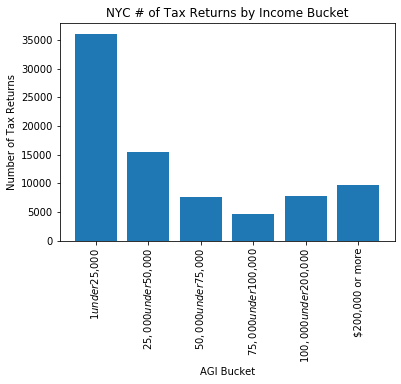

In [19]:
plt.bar(income_df['agi_bucket'],income_df['tot_inc_num_returns'])
plt.xticks(rotation='vertical')
plt.xlabel('AGI Bucket')
plt.ylabel('Number of Tax Returns')
plt.title('NYC # of Tax Returns by Income Bucket');

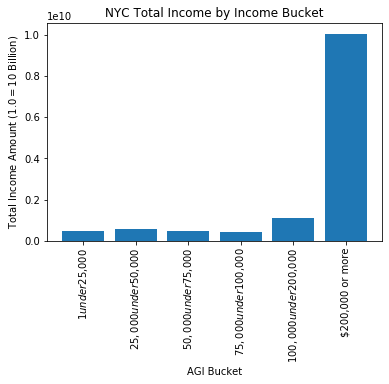

In [20]:
plt.bar(income_df['agi_bucket'],income_df['tot_inc_amnt'])
plt.xticks(rotation='vertical')
plt.xlabel('AGI Bucket')
plt.ylabel('Total Income Amount ($1.0 = $10 Billion)')
plt.title('NYC Total Income by Income Bucket');


#### Gut Check

In [21]:
#https://smartasset.com/retirement/average-salary-in-nyc:
print('SMARTASSET.COM STATS:')
print(' ')
print('Mean Income - Household - NYC: $93,196')
print('Mean Income - Individual - NYC: $74,834')
print(' ')
#our IRS dataset:
print('OUR IRS STATS:')
print(' ')
sum_total_inc = income_df['tot_inc_amnt'].sum()
sum_num_returns = income_df['tot_inc_num_returns'].sum()
mean_inc_per_return = sum_total_inc / sum_num_returns
print (f"Total Income - NYC: ${sum_total_inc}")
print (f"Total # of Returns - NYC: {sum_num_returns}")
print (f"Mean Income Per Tax Return - NYC: ${mean_inc_per_return}")



SMARTASSET.COM STATS:
 
Mean Income - Household - NYC: $93,196
Mean Income - Individual - NYC: $74,834
 
OUR IRS STATS:
 
Total Income - NYC: $331236847000.0
Total # of Returns - NYC: 4020690.0
Mean Income Per Tax Return - NYC: $82383.08524158789


 - Our dataset's mean income generally aligns with mean income numbers reported by a 3rd party site - SmartAsset.com

In [22]:
income_df['avg_inc_by_zip_and_bucket'] = income_df['tot_inc_amnt']/income_df['tot_inc_num_returns']

In [23]:
income_df.head(30)

,zip_code,agi_bucket,num_returns,agi,tot_inc_num_returns,tot_inc_amnt,avg_inc_by_zip_and_bucket
0,10001,"$1 under $25,000",3740.0,4.318200e+07,3740.0,4.484900e+07,1.199171e+04
1,10001,"$25,000 under $50,000",2500.0,9.213300e+07,2500.0,9.432400e+07,3.772960e+04
2,10001,"$50,000 under $75,000",1950.0,1.209220e+08,1950.0,1.231970e+08,6.317795e+04
3,10001,"$75,000 under $100,000",1410.0,1.218800e+08,1410.0,1.236050e+08,8.766312e+04
4,10001,"$100,000 under $200,000",2580.0,3.614530e+08,2580.0,3.661950e+08,1.419360e+05
5,10001,"$200,000 or more",2340.0,1.551726e+09,2340.0,1.570914e+09,6.713308e+05
6,10002,"$1 under $25,000",21180.0,2.511690e+08,21180.0,2.558910e+08,1.208173e+04
7,10002,"$25,000 under $50,000",8210.0,2.965570e+08,8210.0,3.019100e+08,3.677345e+04
8,10002,"$50,000 under $75,000",4810.0,2.945660e+08,4810.0,2.987460e+08,6.210936e+04
9,10002,"$75,000 under $100,000",2710.0,2.344450e+08,2710.0,2.368920e+08,8.741402e+04


#### Arithmetic Average Income by Zip

In [24]:
#ADD AVERAGE INCOME BY ZIP CODE
avg_income_by_zip_df = income_df.groupby(['zip_code']).sum()
avg_income_by_zip_df.drop(columns=['num_returns', 'agi'],inplace=True)
avg_income_by_zip_df['avg_inc_by_zip'] = avg_income_by_zip_df['tot_inc_amnt'] / avg_income_by_zip_df['tot_inc_num_returns']

In [25]:
avg_income_by_zip_df.head()

,tot_inc_num_returns,tot_inc_amnt,avg_inc_by_zip_and_bucket,avg_inc_by_zip
zip_code,,,,
10001,14520.0,2.323084e+09,1.013829e+06,159992.011019
10002,42180.0,2.313723e+09,7.732248e+05,54853.556188
10003,28660.0,6.720746e+09,1.153619e+06,234499.162596
10004,2480.0,8.308280e+08,1.177613e+06,335011.290323
10005,5940.0,3.171561e+09,2.091357e+06,533932.828283


## Alternative Computations to understand Incomes by Zip Code

#### Estimating a Median Income Using the Arithmetic Average Income by Zip & IncomeBucket (that falls in the center based on the number of tax returns filed in each Zip Code)

In [26]:
income_df.head()

,zip_code,agi_bucket,num_returns,agi,tot_inc_num_returns,tot_inc_amnt,avg_inc_by_zip_and_bucket
0,10001,"$1 under $25,000",3740.0,43182000.0,3740.0,44849000.0,11991.711230
1,10001,"$25,000 under $50,000",2500.0,92133000.0,2500.0,94324000.0,37729.600000
2,10001,"$50,000 under $75,000",1950.0,120922000.0,1950.0,123197000.0,63177.948718
3,10001,"$75,000 under $100,000",1410.0,121880000.0,1410.0,123605000.0,87663.120567
4,10001,"$100,000 under $200,000",2580.0,361453000.0,2580.0,366195000.0,141936.046512


In [27]:
avg_income_by_zip_df['median_point'] = avg_income_by_zip_df['tot_inc_num_returns']/2

In [28]:
income_df = pd.merge(left=income_df,right=avg_income_by_zip_df['median_point'], how='left',on='zip_code')

In [29]:
income_df['cumu_sum'] = income_df.groupby('zip_code')['tot_inc_num_returns'].transform(pd.Series.cumsum)

In [30]:
income_df.head()

,zip_code,agi_bucket,num_returns,agi,tot_inc_num_returns,tot_inc_amnt,avg_inc_by_zip_and_bucket,median_point,cumu_sum
0,10001,"$1 under $25,000",3740.0,43182000.0,3740.0,44849000.0,11991.711230,7260.0,3740.0
1,10001,"$25,000 under $50,000",2500.0,92133000.0,2500.0,94324000.0,37729.600000,7260.0,6240.0
2,10001,"$50,000 under $75,000",1950.0,120922000.0,1950.0,123197000.0,63177.948718,7260.0,8190.0
3,10001,"$75,000 under $100,000",1410.0,121880000.0,1410.0,123605000.0,87663.120567,7260.0,9600.0
4,10001,"$100,000 under $200,000",2580.0,361453000.0,2580.0,366195000.0,141936.046512,7260.0,12180.0


In [31]:
income_df['diff_cumu_median'] = income_df['cumu_sum'] - income_df['median_point']
income_df['estimated_median'] = income_df['avg_inc_by_zip_and_bucket']

In [32]:
income_df.loc[income_df['diff_cumu_median'] < 0, 'estimated_median'] = None
income_df.loc[income_df['diff_cumu_median'] < 0, 'diff_cumu_median'] = None

In [33]:
income_df.head()

,zip_code,agi_bucket,num_returns,agi,tot_inc_num_returns,tot_inc_amnt,avg_inc_by_zip_and_bucket,median_point,cumu_sum,diff_cumu_median,estimated_median
0,10001,"$1 under $25,000",3740.0,43182000.0,3740.0,44849000.0,11991.711230,7260.0,3740.0,NaN,NaN
1,10001,"$25,000 under $50,000",2500.0,92133000.0,2500.0,94324000.0,37729.600000,7260.0,6240.0,NaN,NaN
2,10001,"$50,000 under $75,000",1950.0,120922000.0,1950.0,123197000.0,63177.948718,7260.0,8190.0,930.0,63177.948718
3,10001,"$75,000 under $100,000",1410.0,121880000.0,1410.0,123605000.0,87663.120567,7260.0,9600.0,2340.0,87663.120567
4,10001,"$100,000 under $200,000",2580.0,361453000.0,2580.0,366195000.0,141936.046512,7260.0,12180.0,4920.0,141936.046512


In [36]:
est_median_income_by_zip_df = income_df[['zip_code','estimated_median']].groupby(['zip_code']).min()

In [37]:
avg_income_by_zip_df.head()

,tot_inc_num_returns,tot_inc_amnt,avg_inc_by_zip_and_bucket,avg_inc_by_zip,median_point
zip_code,,,,,
10001,14520.0,2.323084e+09,1.013829e+06,159992.011019,7260.0
10002,42180.0,2.313723e+09,7.732248e+05,54853.556188,21090.0
10003,28660.0,6.720746e+09,1.153619e+06,234499.162596,14330.0
10004,2480.0,8.308280e+08,1.177613e+06,335011.290323,1240.0
10005,5940.0,3.171561e+09,2.091357e+06,533932.828283,2970.0


In [39]:
#add estimated median to avg_income_by_zip_df
avg_income_by_zip_df = pd.merge(left=avg_income_by_zip_df,right=est_median_income_by_zip_df, how='left', on='zip_code')

In [42]:
#drop columns irrelevant for future work
avg_income_by_zip_df.drop(columns=['avg_inc_by_zip_and_bucket','median_point'],inplace=True)

In [45]:
avg_income_by_zip_df.rename(columns={'estimated_median': 'est_median_inc'},inplace=True)

### Explore Clean Income DataFrame

In [46]:
avg_income_by_zip_df.head()

,tot_inc_num_returns,tot_inc_amnt,avg_inc_by_zip,est_median_inc
zip_code,,,,
10001,14520.0,2.323084e+09,159992.011019,63177.948718
10002,42180.0,2.313723e+09,54853.556188,12081.728045
10003,28660.0,6.720746e+09,234499.162596,88263.975155
10004,2480.0,8.308280e+08,335011.290323,148632.692308
10005,5940.0,3.171561e+09,533932.828283,144611.764706


In [47]:
avg_income_by_zip_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 10001 to 11697
Data columns (total 4 columns):
tot_inc_num_returns    177 non-null float64
tot_inc_amnt           177 non-null float64
avg_inc_by_zip         177 non-null float64
est_median_inc         177 non-null float64
dtypes: float64(4)
memory usage: 6.9 KB


In [103]:
#change zip code data type to string for Folium
avg_income_by_zip_df.index = avg_income_by_zip_df.index.astype('str') 

### Explore Parks Dataset

In [54]:
parks_df = pd.read_json('DPR_Parks_001.json')

In [55]:
parks_df.head(30)

,Location,Name,Prop_ID,Zip
0,Franklin St. bet. Milton St. and Noble St.,American Playground,B001,11222
1,"E. 38 St., E. 38 St. bet. Ave. I and Ave. J",Amersfort Park,B002,11210
2,"Prospect Park W., 15 St.",Bartel-Pritchard Square,B003,11215
3,"Broadway, Stuyvesant Ave., Vernon Ave.",Beattie Square,B006,11221
4,Cropsey Ave. bet. 21 Ave. and Bay Pkwy.,Bensonhurst Park,B007,11214
5,"Blake Ave., Dumont Ave., Livonia Ave. bet. Str...",Betsy Head Park,B008,11212
6,"Washington Ave., Flatbush Ave. bet. Eastern Pk...",Brooklyn Botanic Garden,B010,11238
7,"St. Mark's Ave., Park Pl. bet. Brooklyn Ave. a...",Brower Park,B012,11213
8,"Irving Ave., Kinickerbocker Ave. bet. Starr St...",Maria Hernandez Park,B016,11237
9,Knickerbocker Ave. bet. Woodbine St. and Putna...,Bushwick Playground,B017,11237


In [56]:
parks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1675 entries, 0 to 1674
Data columns (total 4 columns):
Location    1675 non-null object
Name        1675 non-null object
Prop_ID     1675 non-null object
Zip         1569 non-null object
dtypes: object(4)
memory usage: 52.4+ KB


In [57]:
parks_df.nunique()

Location    1669
Name        1532
Prop_ID     1675
Zip          278
dtype: int64

In [58]:
#explore duplicate park names
parks_df[parks_df.duplicated(subset=['Name'],keep=False)].sort_values(by=['Name'])

,Location,Name,Prop_ID,Zip
1376,Dr. MLK Jr. Blvd. bet. W. Tremont Ave. and E. ...,Aqueduct Walk,X001A,"10453, 10468"
1375,Aqueduct Ave. W. bet. W. Fordham Rd. and W. Ki...,Aqueduct Walk,X001,10468
713,bet. Hudson River and South End Ave. S/o Liber...,Battery Park City,M283A,10280
712,"Hudson River, Liberty St. West St, and Pier A",Battery Park City,M283,"10007, 10013, 10280"
312,Belmont Ave. between Forbell St. and Drew St.,Belmont Playground,B283,11208
1471,E 182 St bet. Belmont Av and Croton Av,Belmont Playground,X108,10457
1460,Harlem River bet. W 175 St and Alexander Hamil...,Bridge Park,X094,"10452, 10453"
220,"Prospect St., York St. bet. Jay St. and Bridge...",Bridge Park,B223JB,11201
550,"Broadway, Columbus Circle To W 110 St",Broadway Malls,M094,"10023, 10024, 10025"
552,"Broadway, W. 135 St. To W. 156 St.",Broadway Malls,M095,"10031, 10032"


- Insight: park names may span multiple Prop_ID's and multiple Zip Codes
- All 1,675 Prop_IDs are unique to each row - Keep all prop_id's

In [59]:
parks_df.describe()

,Location,Name,Prop_ID,Zip
count,1675,1675,1675,1569
unique,1669,1532,1675,278
top,"1 Ave., bet. E. 41 St. and E. 42 St.",Park,X295,11211
freq,2,36,1,41


### Explore Playgrounds dataset

In [60]:
playgrounds_df = pd.read_json('DPR_Playgrounds_001.json')

In [61]:
playgrounds_df.head(30)

,Accessible,Adaptive_Swing,Level,Location,Name,Playground_ID,Prop_ID,School_ID,Status,lat,lon
0,Y,N,4.0,"Noble, Franklin, Milton Streets",American Playground,B001,B001,None,None,40.7288,-73.9579
1,Y,N,4.0,BAY PKWY & CROPSEY AVENUE,Bensonhurst Park,B007-01,B007,None,None,40.5969,-73.9998
2,Y,N,1.0,DUMONT AVE & BRISTOL ST,Betsy Head Memorial Playground,B008-03,B008,None,None,40.6645,-73.9118
3,Y,N,2.0,BROOKLYN AVE & PROSPECT PL,Brower Park,B012-02,B012,None,None,40.6735,-73.9438
4,Y,Y,2.0,BROOKLYN AVE & PROSPECT PL,Brower Park,B012-03,B012,None,None,40.6744,-73.9432
5,Y,N,3.0,KNICKERBOCKER ST ENTRANCE,Maria Hernandez Park,B016-01,B016,None,None,40.7028,-73.9243
6,N,None,NaN,IRVING AVE ENTRANCE,Maria Hernandez Park,B016,B016,None,None,40.7036,-73.9234
7,Y,N,4.0,"Knickerbocker, Putnam Aves, Woodbine St",Bushwick Playground,B017,B017,None,None,40.6961,-73.9122
8,Y,N,4.0,"E. 92 ST, SEAVIEW AVE",Dinapoli Playground,B018-01,B018,None,None,40.6308,-73.8930
9,Y,Y,3.0,"Carroll, Court, President, Smith Sts",Carroll Park,B019,B019,None,None,40.6811,-73.9954


In [62]:
playgrounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1269 entries, 0 to 1268
Data columns (total 11 columns):
Accessible        1266 non-null object
Adaptive_Swing    1173 non-null object
Level             1175 non-null float64
Location          1266 non-null object
Name              1269 non-null object
Playground_ID     1021 non-null object
Prop_ID           1269 non-null object
School_ID         234 non-null object
Status            234 non-null object
lat               1245 non-null float64
lon               1245 non-null float64
dtypes: float64(3), object(8)
memory usage: 109.1+ KB


In [63]:
playgrounds_df.describe()

,Level,lat,lon
count,1175.000000,1245.000000,1245.000000
mean,3.571064,40.691978,-73.923549
std,0.792757,1.157509,0.090063
min,1.000000,0.000000,-74.244900
25%,3.000000,40.663300,-73.969800
50%,4.000000,40.717400,-73.925600
75%,4.000000,40.800700,-73.872000
max,4.000000,40.902500,-73.709600


In [64]:
print(playgrounds_df[~playgrounds_df['School_ID'].isna()].shape) #shape of non-null School_ID dataframe
print(playgrounds_df[playgrounds_df['School_ID'].isna()].shape) #shape of null School_ID dataframe
print(playgrounds_df.shape) #shape of dataframe

(234, 11)
(1035, 11)
(1269, 11)


In [65]:
#remove school playgrounds from playgrounds_df
playgrounds_df = playgrounds_df[playgrounds_df['School_ID'].isna()]

In [66]:
playgrounds_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1035 entries, 0 to 1268
Data columns (total 11 columns):
Accessible        1032 non-null object
Adaptive_Swing    939 non-null object
Level             941 non-null float64
Location          1032 non-null object
Name              1035 non-null object
Playground_ID     1021 non-null object
Prop_ID           1035 non-null object
School_ID         0 non-null object
Status            0 non-null object
lat               1018 non-null float64
lon               1018 non-null float64
dtypes: float64(3), object(8)
memory usage: 97.0+ KB


In [67]:
playgrounds_df.nunique()

Accessible           2
Adaptive_Swing       3
Level                4
Location          1027
Name               982
Playground_ID     1017
Prop_ID            865
School_ID            0
Status               0
lat                866
lon                835
dtype: int64

In [68]:
#explore duplicate Playground_ID's
playgrounds_df[playgrounds_df.duplicated(subset=['Playground_ID'],keep=False)].sort_values(by=['Playground_ID'])

,Accessible,Adaptive_Swing,Level,Location,Name,Playground_ID,Prop_ID,School_ID,Status,lat,lon
36,Y,N,2.0,"67 ST & COLONIAL RD, NORTH OF B066-02",Owls Head Park,B066,B066,None,None,40.6400,-74.0305
37,Y,N,2.0,"NR ENT @ COLONIAL RD/67 ST, SOUTH OF B066-01",Owls Head Park,B066,B066,None,None,40.6394,-74.0308
71,Y,N,4.0,"3 To 4 Sts, 4 To 5 Aves",Washington Park,B111,B111,None,None,40.6728,-73.9842
996,Y,N,4.0,Washington Park,Washington Park,B111,B111,None,None,NaN,NaN
572,Y,Y,3.0,"VERNON BLVD, 40 & 41 AVES",Vernon Playground,Q104-01,Q104,None,None,40.7571,-73.9470
574,N,None,NaN,,VERNON PLAYGROUND,Q104-01,Q104,None,None,40.7571,-73.9470
590,Y,N,4.0,225 St & 104 Ave,Pat Williams Playground,Q133,Q133,None,None,40.7100,-73.7285
591,Y,N,4.0,224 ST & 101 AVE,Pat Williams Playground,Q133,Q133,None,None,40.7100,-73.7285
1233,Y,N,4.0,At the corner of Cleveland and Mansion Avenues,Seaside Wildlife Nature Park,None,R145,None,None,40.5418,-74.1426
1237,Y,Y,3.0,Boardwalk between Beach 29th and Beach 30th St...,Beach 30th Street Playground,None,Q162,None,None,40.5926,-73.7620


- Some Prop_IDs may have multiple playgrounds - use a left join where all playgrounds remain in the set, and relevant zip codes are added to each

In [69]:
#drop duplicate playgrounds where lat/longs are the same 
#and those where the extra row doesn't provide new information
playgrounds_df.drop(index = [37, 996, 574, 591],inplace=True)

In [70]:
playgrounds_df['Playground_ID'][playgrounds_df.duplicated(subset=['Playground_ID'],keep=False)] = playgrounds_df['Prop_ID'][playgrounds_df.duplicated(subset=['Playground_ID'],keep=False)]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [71]:
playgrounds_df[playgrounds_df.duplicated(subset=['Playground_ID'],keep=False)]

,Accessible,Adaptive_Swing,Level,Location,Name,Playground_ID,Prop_ID,School_ID,Status,lat,lon
993,Y,N,2.0,Main and Plymouth streets,Brooklyn Bridge Park,B431,B431,None,None,40.7041,-73.9902
1242,Y,Y,3.0,Pier 1 - at Old Fulton Street and Furman Street,Pier 1 Playground,B431,B431,None,None,40.7021,-73.9965
1243,Y,N,4.0,Pier 5 - at Joralemon Street,Pier 5 Playground,B431,B431,None,None,40.6948,-74.0005
1244,Y,N,4.0,Pier 6 - between Atlantic Avenue and Joralemon...,Waterlab,B431,B431,None,None,40.6931,-74.0013
1245,Y,Y,3.0,Pier 6 - at Atlantic Avenue and Furman Street,Swing Valley,B431,B431,None,None,40.6931,-74.0013
1246,Y,N,4.0,Pier 6 - between Atlantic Avenue and Joralemon...,Sandbox Village,B431,B431,None,None,40.6931,-74.0013
1247,Y,N,4.0,Pier 6 - between Atlantic Avenue and Joralemon...,Slide Mountain,B431,B431,None,None,0.0000,-74.0009
1248,Y,Y,4.0,Pier 2,Pier 2 Swings,B431,B431,None,None,40.6931,-74.0013
1249,Y,N,4.0,Pier 6 - between Atlantic Avenue and Joralemon...,Marsh Garden,B431,B431,None,None,40.6931,-74.0013


In [72]:
#add tag to Playground_ID=B431 (Brooklyn Bridge park) to mark the multiple playgrounds
playgrounds_df.loc[1242,'Playground_ID'] = 'B431_1'
playgrounds_df.loc[1243,'Playground_ID'] = 'B431_2'
playgrounds_df.loc[1244,'Playground_ID'] = 'B431_3'
playgrounds_df.loc[1245,'Playground_ID'] = 'B431_4'
playgrounds_df.loc[1246,'Playground_ID'] = 'B431_5'
playgrounds_df.loc[1247,'Playground_ID'] = 'B431_6'
playgrounds_df.loc[1248,'Playground_ID'] = 'B431_7'
playgrounds_df.loc[1249,'Playground_ID'] = 'B431_8'

In [73]:
#recheck duplicate playgrounds to ensure all are unique
playgrounds_df[playgrounds_df.duplicated(subset=['Playground_ID'],keep=False)]

,Accessible,Adaptive_Swing,Level,Location,Name,Playground_ID,Prop_ID,School_ID,Status,lat,lon


In [74]:
#Drop School & Status columns from new playgrounds_df
playgrounds_df.drop(columns=['School_ID', 'Status'],inplace=True)

### Add Zip Codes from Parks dataset to Playground dataset using LEFT JOIN (playground = left df, parks = right df) on Prop_ID

In [75]:
playgrounds_zip_df = pd.merge(left=playgrounds_df, right=parks_df[['Prop_ID','Zip']], how='left', on='Prop_ID')

In [76]:
b.head(20)

,Accessible,Adaptive_Swing,Level,Location,Name,Playground_ID,Prop_ID,lat,lon,Zip
0,Y,N,4.0,"Noble, Franklin, Milton Streets",American Playground,B001,B001,40.7288,-73.9579,11222
1,Y,N,4.0,BAY PKWY & CROPSEY AVENUE,Bensonhurst Park,B007-01,B007,40.5969,-73.9998,11214
2,Y,N,1.0,DUMONT AVE & BRISTOL ST,Betsy Head Memorial Playground,B008-03,B008,40.6645,-73.9118,11212
3,Y,N,2.0,BROOKLYN AVE & PROSPECT PL,Brower Park,B012-02,B012,40.6735,-73.9438,11213
4,Y,Y,2.0,BROOKLYN AVE & PROSPECT PL,Brower Park,B012-03,B012,40.6744,-73.9432,11213
5,Y,N,3.0,KNICKERBOCKER ST ENTRANCE,Maria Hernandez Park,B016-01,B016,40.7028,-73.9243,11237
6,N,None,NaN,IRVING AVE ENTRANCE,Maria Hernandez Park,B016,B016,40.7036,-73.9234,11237
7,Y,N,4.0,"Knickerbocker, Putnam Aves, Woodbine St",Bushwick Playground,B017,B017,40.6961,-73.9122,11237
8,Y,N,4.0,"E. 92 ST, SEAVIEW AVE",Dinapoli Playground,B018-01,B018,40.6308,-73.8930,"11236, 11239"
9,Y,Y,3.0,"Carroll, Court, President, Smith Sts",Carroll Park,B019,B019,40.6811,-73.9954,11231


In [77]:
playgrounds_zip_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031 entries, 0 to 1030
Data columns (total 10 columns):
Accessible        1028 non-null object
Adaptive_Swing    936 non-null object
Level             938 non-null float64
Location          1028 non-null object
Name              1031 non-null object
Playground_ID     1031 non-null object
Prop_ID           1031 non-null object
lat               1015 non-null float64
lon               1015 non-null float64
Zip               1004 non-null object
dtypes: float64(3), object(7)
memory usage: 88.6+ KB


In [80]:
#drop rows where Zip is null
playgrounds_zip_df.dropna(subset=['Zip'],inplace=True)

In [81]:
#test for rows where Zip is null
playgrounds_zip_df[playgrounds_zip_df['Zip'].isna()]

,Accessible,Adaptive_Swing,Level,Location,Name,Playground_ID,Prop_ID,lat,lon,Zip


In [86]:
playgrounds_zip_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1004 entries, 0 to 1030
Data columns (total 10 columns):
Accessible        1001 non-null object
Adaptive_Swing    916 non-null object
Level             918 non-null float64
Location          1001 non-null object
Name              1004 non-null object
Playground_ID     1004 non-null object
Prop_ID           1004 non-null object
lat               997 non-null float64
lon               997 non-null float64
Zip               1004 non-null object
dtypes: float64(3), object(7)
memory usage: 86.3+ KB


In [85]:
#EACH ROW SHOULD REPRESENT 1 UNIQUE PLAYGROUND
playgrounds_zip_df.nunique()

Accessible           2
Adaptive_Swing       3
Level                4
Location           996
Name               960
Playground_ID     1004
Prop_ID            838
lat                853
lon                823
Zip                211
dtype: int64

- For Playgrounds with multiple Zip Codes, I decided to simply utilize the first one in each list (the first 5 digits in the Zip column)

In [92]:
# Show dataframe and shape of dataframe where multiple Zips are given
print(playgrounds_zip_df[(playgrounds_zip_df.Zip.str.len() > 5)].shape)
playgrounds_zip_df[(playgrounds_zip_df.Zip.str.len() > 5)]

(175, 10)


,Accessible,Adaptive_Swing,Level,Location,Name,Playground_ID,Prop_ID,lat,lon,Zip
8,Y,N,4.0,"E. 92 ST, SEAVIEW AVE",Dinapoli Playground,B018-01,B018,40.6308,-73.8930,"11236, 11239"
15,Y,N,4.0,CROPSEY & BAY 8,Bay 8 Playground,B028-01,B028,40.6067,-74.0163,"11209, 11228"
16,Y,N,4.0,14 AVE & 86 ST,Dyker Playground,B028-03,B028,40.6127,-74.0127,"11209, 11228"
17,Y,N,2.0,MYRTLE AVE & ST EDWARDS PLAZA,Fort Greene Playground,B032-01,B032,40.6924,-73.9771,"11201, 11205"
18,Y,N,2.0,DEKALB AVE & CUMBERLAND ST,Fort Greene Park,B032-02,B032,40.6902,-73.9737,"11201, 11205"
24,Y,N,2.0,"4TH AVE TO CS ADJ 5TH AVE, BTWN 66TH AND 67TH ...",Leif Ericson Park,B052-01,B052,40.6356,-74.0195,"11219, 11220"
25,N,None,NaN,"7TH AV (EAST SIDE OF HIGHWAY) TO 8TH AVE, 66TH...",Leif Ericson Park,B052-02,B052,40.6323,-74.0144,"11219, 11220"
26,N,None,NaN,"8TH AVE TO FT HAMILTON PKWY, BTWN 66TH AND 67T...",Leif Ericson Park,B052-03,B052,40.6308,-74.0119,"11219, 11220"
27,Y,Y,4.0,"ROCHESTER AVE, CARROLL ST",Lincoln Terrace Park / Arthur S. Somers Playgr...,B054-01,B054,40.6664,-73.9279,"11213, 11233"
30,Y,Y,3.0,"FILLMORE AVE, MADISON PL",Ps 278 Playground,B057-03,B057,40.6070,-73.9382,"11229, 11234, 11235"


In [96]:
#replace Zip string with first 5 characters of Zip string in all rows
playgrounds_zip_df['Zip'] = playgrounds_zip_df['Zip'].str[0:5]

In [99]:
playgrounds_zip_df[(playgrounds_zip_df.Zip.str.len() > 5)]

,Accessible,Adaptive_Swing,Level,Location,Name,Playground_ID,Prop_ID,lat,lon,Zip


In [101]:
playgrounds_zip_df.nunique()

Accessible           2
Adaptive_Swing       3
Level                4
Location           996
Name               960
Playground_ID     1004
Prop_ID            838
lat                853
lon                823
Zip                163
dtype: int64

- Ready to join Playgrounds dataframe (162 unique zipcodes) with Income-related dataframe (177 unique zip codes) ON Zip Code key

### Join Playground w/ Zip Codes dataset with Income by Zip Code dataset

In [105]:
play_inc_df = pd.merge(left = playgrounds_zip_df, right = avg_income_by_zip_df, how='left', left_on='Zip', right_on='zip_code')

In [106]:
play_inc_df.head()

,Accessible,Adaptive_Swing,Level,Location,Name,Playground_ID,Prop_ID,lat,lon,Zip,tot_inc_num_returns,tot_inc_amnt,avg_inc_by_zip,est_median_inc
0,Y,N,4.0,"Noble, Franklin, Milton Streets",American Playground,B001,B001,40.7288,-73.9579,11222,22570.0,1.691879e+09,74961.408950,62850.112360
1,Y,N,4.0,BAY PKWY & CROPSEY AVENUE,Bensonhurst Park,B007-01,B007,40.5969,-73.9998,11214,40860.0,1.780414e+09,43573.519334,36122.280335
2,Y,N,1.0,DUMONT AVE & BRISTOL ST,Betsy Head Memorial Playground,B008-03,B008,40.6645,-73.9118,11212,38370.0,1.196980e+09,31195.725827,13046.153846
3,Y,N,2.0,BROOKLYN AVE & PROSPECT PL,Brower Park,B012-02,B012,40.6735,-73.9438,11213,29300.0,1.201558e+09,41008.805461,36607.792208
4,Y,Y,2.0,BROOKLYN AVE & PROSPECT PL,Brower Park,B012-03,B012,40.6744,-73.9432,11213,29300.0,1.201558e+09,41008.805461,36607.792208


In [107]:
play_inc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1004 entries, 0 to 1003
Data columns (total 14 columns):
Accessible             1001 non-null object
Adaptive_Swing         916 non-null object
Level                  918 non-null float64
Location               1001 non-null object
Name                   1004 non-null object
Playground_ID          1004 non-null object
Prop_ID                1004 non-null object
lat                    997 non-null float64
lon                    997 non-null float64
Zip                    1004 non-null object
tot_inc_num_returns    999 non-null float64
tot_inc_amnt           999 non-null float64
avg_inc_by_zip         999 non-null float64
est_median_inc         999 non-null float64
dtypes: float64(7), object(7)
memory usage: 117.7+ KB


In [108]:
play_inc_df[play_inc_df['est_median_inc'].isna()]

,Accessible,Adaptive_Swing,Level,Location,Name,Playground_ID,Prop_ID,lat,lon,Zip,tot_inc_num_returns,tot_inc_amnt,avg_inc_by_zip,est_median_inc
359,Y,N,4.0,"1 Ave, E 67 To E 68 Sts",St Catherine's Park,M079,M079,40.7652,-73.9587,10065,NaN,NaN,NaN,NaN
375,Y,N,4.0,"Fdr Drive, E 60 To E 61 Sts & York Ave",Twenty Four Sycamores Park,M108Q,M108Q,40.7595,-73.9587,10065,NaN,NaN,NaN,NaN
573,N,None,NaN,224 STREET & 101 AVE,Playground,Q135-01,Q135,40.7130,-73.7295,11003,NaN,NaN,NaN,NaN
977,Y,N,4.0,120th Avenue and 238th Street,Laurelton West Playground,Q027,Q027,40.6850,-73.7270,11003,NaN,NaN,NaN,NaN
988,Y,None,NaN,"Murray Ave, Jarman Rd, Sylvester Ln, Abbot Rd",Fort Totten Playground,Q458,Q458,40.7941,-73.7780,11359,NaN,NaN,NaN,NaN


In [113]:
#double check that income dataframe didn't include 10065, 11003, or 11359
print(len(avg_income_by_zip_df[avg_income_by_zip_df.index == '10065']))
print(len(avg_income_by_zip_df[avg_income_by_zip_df.index == '11003']))
print(len(avg_income_by_zip_df[avg_income_by_zip_df.index == '11359']))

0
0
0


In [114]:
# drop rows in play_inc_df where the relevant playground zip codes do not have any income data associated with them
play_inc_df.dropna(subset=['est_median_inc'],inplace=True)

In [115]:
play_inc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 1003
Data columns (total 14 columns):
Accessible             996 non-null object
Adaptive_Swing         913 non-null object
Level                  915 non-null float64
Location               996 non-null object
Name                   999 non-null object
Playground_ID          999 non-null object
Prop_ID                999 non-null object
lat                    992 non-null float64
lon                    992 non-null float64
Zip                    999 non-null object
tot_inc_num_returns    999 non-null float64
tot_inc_amnt           999 non-null float64
avg_inc_by_zip         999 non-null float64
est_median_inc         999 non-null float64
dtypes: float64(7), object(7)
memory usage: 117.1+ KB


In [116]:
play_inc_df.nunique()

Accessible               2
Adaptive_Swing           3
Level                    4
Location               991
Name                   956
Playground_ID          999
Prop_ID                833
lat                    850
lon                    821
Zip                    160
tot_inc_num_returns    158
tot_inc_amnt           160
avg_inc_by_zip         160
est_median_inc         160
dtype: int64

- We have a clean dataset from which to work from! 
- We have 999 unique NYC playgrounds to work with spanning 160 NYC zip codes
- Each zip code, and therefore each playground, is now labelled with relevant income data